Obtenga el dataset “data_services”.

In [3]:
import pandas as pd
df = pd.read_excel("data_services.xlsx", parse_dates = ["date_start", "date_end"])
df.head()

,id,first_name,last_name,gender,dpto,internal_cost,price,service,date_start,date_end
0,1,Silva,Koba,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31
1,2,Chrissy,Fudge,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12
2,3,Danell,Waite,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20
3,4,Oralia,Smolan,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13
4,5,Ericha,Ghione,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24


En la columna dpto se encuentran como faltantes los datos de los trabajos que fueron realizados al
exterior. Por tanto, completar esos datos faltantes con una categoría que sea “Extranjero”.

In [5]:
df["dpto"].fillna('Extranjero', inplace = True)
df.dpto.unique()

array(['Cerro Largo', 'Tacuarembó', 'Montevideo', 'Colonia', 'Extranjero',
       'Salto'], dtype=object)

Obtener una columna denominada “nombre_completo” que sea la concatenación de las columnas
first_name y last_name. En aquellos casos que no se cuente con el nombre de pila, sustituir por
“Mr/Ms”.

In [39]:
df.first_name.fillna('Mr/Ms', inplace = True)

nueva_col = []
for i in range(len(df.first_name)):
    item = df.first_name[i] + ' ' + df.last_name[i]
    nueva_col.append(item)

df["nombre_completo"] = nueva_col
df.head()

,id,first_name,last_name,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo
0,1,Silva,Koba,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba
1,2,Chrissy,Fudge,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge
2,3,Danell,Waite,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite
3,4,Oralia,Smolan,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan
4,5,Ericha,Ghione,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione


In [41]:
df.drop(["first_name", "last_name"], axis = 'columns', inplace = True)

Genere una columna que se denomina “tiempo_trabajo” que sea la diferencia de días entre el inicio y el
fin de cada proyecto.

In [46]:
dates_dif = []

for f in range(len(df.date_start)):
  item = df.date_end[f] - df.date_start[f]
  dates_dif.append(item.days)

df["tiempo_trabajo"] = dates_dif
df.head()

,id,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo,tiempo_trabajo
0,1,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba,152
1,2,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge,84
2,3,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite,153
3,4,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan,176
4,5,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione,180


Genere una columna que se denomine “beneficios” que sea la diferencia entre el costo del servicio y el
precio solicitado al cliente.

In [48]:
df['beneficios'] = df.price - df.internal_cost
df.head()

,id,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo,tiempo_trabajo,beneficios
0,1,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba,152,270.81
1,2,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge,84,31.93
2,3,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite,153,304.75
3,4,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan,176,203.82
4,5,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione,180,127.14


i. ¿Cuál es el total de ganancia que se ha obtenido en este período?

In [49]:
df.beneficios.sum()

19582.38

ii. ¿Cuál es la ganancia total para cada mes y el promedio por mes?

In [52]:
df.date_end[0].month
df.date_end[0].year

2021

In [54]:
date_end_meses = []
date_end_año = []

for i in range(len(df.date_end)):
  date_end_meses.append(df.date_end[i].month)
  date_end_año.append(df.date_end[i].year)

df["date_end_meses"] = date_end_meses
df["date_end_año"] = date_end_año

df.head()

,id,gender,dpto,internal_cost,price,service,date_start,date_end,nombre_completo,tiempo_trabajo,beneficios,date_end_meses,date_end_año
0,1,Male,Cerro Largo,66.11,336.92,Análisis,2020-12-30,2021-05-31,Silva Koba,152,270.81,5,2021
1,2,Polygender,Cerro Largo,20.07,52.00,Análisis,2021-01-18,2021-04-12,Chrissy Fudge,84,31.93,4,2021
2,3,Male,Tacuarembó,12.13,316.88,Análisis,2021-01-18,2021-06-20,Danell Waite,153,304.75,6,2021
3,4,Polygender,Montevideo,94.64,298.46,Implementación de Software,2021-01-18,2021-07-13,Oralia Smolan,176,203.82,7,2021
4,5,Female,Colonia,132.62,259.76,Visualización,2021-02-25,2021-08-24,Ericha Ghione,180,127.14,8,2021


In [55]:
df.groupby(["date_end_año", "date_end_meses"]).agg({
    "beneficios" : ["sum", "mean"]
})

beneficios            
                                   sum        mean
date_end_año date_end_meses                       
2021         1                  713.04  142.608000
             2                 2672.78  133.639000
             3                 3606.36  138.706154
             4                 1453.43   80.746111
             5                 5536.27  145.691316
             6                 3322.91  151.041364
             7                 1516.88  108.348571
             8                  760.71  108.672857

iii. ¿Cuál servicio ha dado más ganancia y cuál en promedio?

In [56]:
df.groupby("service").agg({
    "beneficios" : ["sum", "mean"]
})

beneficios            
                                  sum        mean
service                                          
Análisis                      4084.33  120.127353
Capacitación                  5194.19  140.383514
Implementación de Software    5137.55  131.732051
Visualización                 5166.31  129.157750

iv. ¿Cuál servicio es el más costoso en promedio?

In [57]:
df.groupby("service").agg({
    "internal_cost" : "mean"
})

,internal_cost
service,
Análisis,80.720588
Capacitación,90.042703
Implementación de Software,71.052821
Visualización,73.782500


¿Cómo es la relación entre costo – precio entre los servicios? Genere una tabla que ordene de
mayor diferencia costo-precio a menor. Es decir, cuál tiende a dar mayor y menor beneficio.

In [62]:
df["relacion_costo"] = df.internal_cost / df.price

df.groupby("service").agg({
    "relacion_costo" : "mean"
}).sort_values(by = "relacion_costo", ascending = False)

,relacion_costo
service,
Análisis,0.608850
Implementación de Software,0.483264
Capacitación,0.480105
Visualización,0.447544


vi. ¿Cuál es el servicio que en promedio lleva más tiempo realizar?

In [63]:
df.groupby("service").agg({
    "tiempo_trabajo" : "mean"
})

,tiempo_trabajo
service,
Análisis,64.500000
Capacitación,121.000000
Implementación de Software,116.410256
Visualización,99.150000


i. Una visualización que muestre el total beneficio por departamento en un gráfico de barras
verticales.

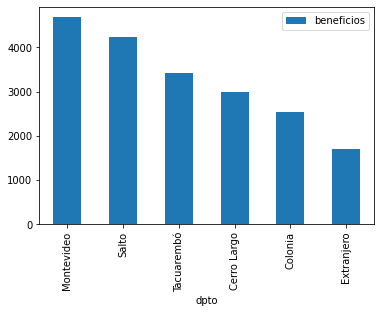

In [68]:
df.groupby("dpto").agg({
    "beneficios" : "sum"
}).sort_values(by = 'beneficios', ascending = False).plot(kind = "bar")

ii. Una gráfica de barras horizontales que muestre el total beneficio por el género del cliente.

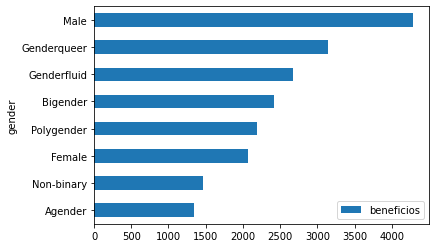

In [70]:
df.groupby("gender").agg({
    "beneficios" : "sum"
}).sort_values(by = 'beneficios', ascending = True).plot(kind = "barh")

iii. Una gráfica que muestre la evolución de los beneficios, mediante la fecha de finalización.

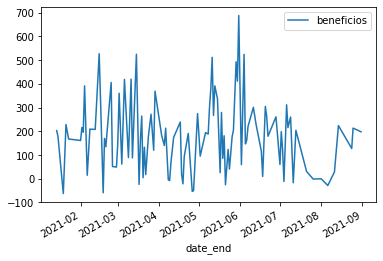

In [72]:
df.groupby("date_end").agg({
    "beneficios" : "sum"
}).plot()